In [ ]:
%pylab inline 
import face_recognition
import cv2
import matplotlib.patches as patches
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

KeyboardInterrupt: 

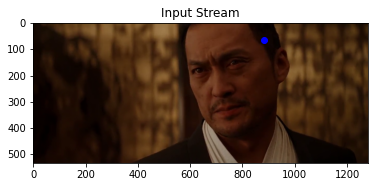

In [43]:

# Loading video for face detection
video_capture = cv2.VideoCapture("./Inception_3.mp4")

frame_count = 0

while video_capture.isOpened():    
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Bail out when the video file ends
    if not ret:
        video_capture.release()
        break
        
    # We will search face in every 15 frames to speed up process.
    frame_count += 1
    if frame_count % 15 == 0:    
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Display video frame
        title("Input Stream")
        plt.imshow(frame)        

        # Find all the faces and face encodings in the current frame of video
        rgb_frame = frame[:, :, ::-1]
        face_locations = face_recognition.face_locations(rgb_frame)
        face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)
        
        # If faces were found, we will mark it on frame with blue dots
        for face_location in face_locations:          
            plt.plot(face_location[1], face_location[0], 'bo')
            plt.plot(face_location[1], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[0], 'bo')

        # Show frame...
        plt.show() 
        # ... and hold it until a new frame appears
        clear_output(wait=True)

(64, 528, 219, 373)
(199, 999, 307, 892)


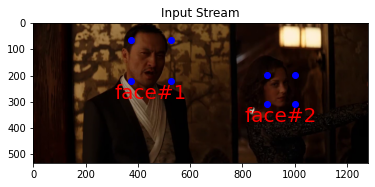

In [99]:
# Loading video for face detection
video_capture = cv2.VideoCapture("./Inception_3.mp4")

frame_count = 0

text_kwargs = dict(ha='center', va='center', fontsize=20, color='red')

known_face_names = []
known_face_encodings = []
face_names = []

while video_capture.isOpened():    
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Bail out when the video file ends
    if not ret:
        video_capture.release()
        break
        
    # We will search face in every 15 frames to speed up process.
    frame_count += 1
    if frame_count % 10 == 0:    
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Display video frame
        title("Input Stream")
        plt.imshow(frame)        

        # Find all the faces and face encodings in the current frame of video
        rgb_frame = frame[:, :, ::-1]
        face_locations = face_recognition.face_locations(rgb_frame)
        face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)
        
        # ENABLE REMEMBER FACE FEATURE
        face_names = []
        for idx, face_encoding in enumerate(face_encodings):
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

            # If a match was found in known_face_encodings, just use the first one.
            if True in matches:
                first_match_index = matches.index(True)
                name = known_face_names[first_match_index]
#                 print(name)
            else:
                known_face_encodings.append(face_encoding)
                name = "face#" + str(len(known_face_encodings))
                known_face_names.append(name)
                
                print(face_locations[idx])
                f = frame[face_locations[idx][0]:face_locations[idx][2],face_locations[idx][3]:face_locations[idx][1]]
                
                cv2.imwrite("{}.jpg".format(name), f) 
#                 title("Input Stream")
#                 plt.imshow(frame[64:219,373:528])   
#                 plt.show() 
#                 break
            face_names.append(name)
#         break
        
        # If faces were found, we will mark it on frame with blue dots  
        for face_location, name in zip(face_locations, face_names):        
            plt.plot(face_location[1], face_location[0], 'bo')
            plt.plot(face_location[1], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[0], 'bo')
            plt.text((face_location[3]+face_location[1])/2, face_location[2]+50, name, **text_kwargs)

        # Show frame...
        plt.show() 
        # ... and hold it until a new frame appears
        clear_output(wait=True)
        break

In [103]:
import json

#### EXPORT EXTRACTED DATA
# Loading video for face detection
video_capture = cv2.VideoCapture("./Inception_3.mp4")

frame_count = 0

text_kwargs = dict(ha='center', va='center', fontsize=20, color='red')

known_face_names = []
known_face_encodings = []
face_names = []
timeline = {}
face_location = []

merge_interval = 30

while video_capture.isOpened():    
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Bail out when the video file ends
    if not ret:
        video_capture.release()
        break
        
    # We will search face in every 15 frames to speed up process.
    frame_count += 1
    if frame_count % 5 == 0:    
        original_frame = frame
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Display video frame
#         title("Input Stream")
#         plt.imshow(frame)        

        # Find all the faces and face encodings in the current frame of video
        rgb_frame = frame[:, :, ::-1]
        face_locations = face_recognition.face_locations(rgb_frame)
        face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)
        
        frame_data = {'frame': frame_count, 'loc':{}}
        # ENABLE REMEMBER FACE FEATURE
        face_names = []
        for idx, face_encoding in enumerate(face_encodings):
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

            # If a match was found in known_face_encodings, just use the first one.
            if True in matches:
                first_match_index = matches.index(True)
                name = known_face_names[first_match_index]
#                 print(name)
                # one sec for 30 fps
                if timeline[name][-1][1] > (frame_count - merge_interval):
                    # within an interval
                    timeline[name][-1][1] = frame_count
                else:
                    # not within an interval
                    timeline[name].append([frame_count,frame_count])
#                 face_location[name].append(face_locations[idx])
                frame_data['loc'][name] = face_locations[idx]
            else:
                known_face_encodings.append(face_encoding)
                name = "face_" + str(len(known_face_encodings))
                known_face_names.append(name)
                timeline[name] = [[frame_count,frame_count]]
#                 face_location[name] = [face_locations[idx]]
                frame_data['loc'][name] = face_locations[idx]
    
                f = original_frame[face_locations[idx][0]:face_locations[idx][2],face_locations[idx][3]:face_locations[idx][1]]   
                cv2.imwrite("{}.jpg".format(name), f) 
                
            face_names.append(name)
        face_location.append(frame_data)
        
        
        # If faces were found, we will mark it on frame with blue dots  
#         for face_location, name in zip(face_locations, face_names):        
#             plt.plot(face_location[1], face_location[0], 'bo')
#             plt.plot(face_location[1], face_location[2], 'bo')
#             plt.plot(face_location[3], face_location[2], 'bo')
#             plt.plot(face_location[3], face_location[0], 'bo')
#             plt.text((face_location[3]+face_location[1])/2, face_location[2]+50, name, **text_kwargs)

#         # Show frame...
#         plt.show() 
#         # ... and hold it until a new frame appears
#         clear_output(wait=True)
        

extracted_data = {'face':known_face_names, 'frame':{'start':0, 'end':frame_count}, 'face_timeline':timeline}

print(extracted_data)

with open('timeline.json', 'w') as fp:
    json.dump(extracted_data, fp)

with open('face_loc.json', 'w') as fp:
    json.dump(face_location, fp)
    
    

{'face': ['face_1', 'face_2', 'face_3', 'face_4', 'face_5', 'face_6', 'face_7', 'face_8', 'face_9', 'face_10', 'face_11', 'face_12', 'face_13', 'face_14'], 'frame': {'start': 0, 'end': 4517}, 'face_timeline': {'face_1': [[5, 60], [160, 285], [385, 440], [860, 895], [930, 930], [1005, 1050], [2225, 2255], [2485, 2495], [3345, 3355]], 'face_2': [[5, 60], [160, 185], [445, 470], [585, 765], [860, 920], [1175, 1180], [1845, 1850], [2085, 2095], [2240, 2255], [2480, 2555]], 'face_3': [[65, 155], [330, 380], [475, 580], [830, 855], [1055, 1055], [3205, 3205], [3585, 3585], [3880, 3915], [4055, 4075]], 'face_4': [[155, 155], [635, 680], [825, 825], [1085, 1090], [1480, 1480], [1555, 1555], [1585, 1585], [1835, 1855], [2205, 2205], [3210, 3210], [3320, 3320], [3525, 3525], [3580, 3590]], 'face_5': [[195, 195], [1840, 1840], [2500, 2500]], 'face_6': [[290, 325], [770, 775], [870, 870], [1025, 1040], [1070, 1085], [2245, 2245]], 'face_7': [[290, 325], [445, 470], [585, 670], [770, 775], [805, 80

In [ ]:
import json
# Loading video for face detection
video_capture = cv2.VideoCapture("./Inception_3.mp4")

frame_count = 0

text_kwargs = dict(ha='center', va='center', fontsize=20, color='red')

with open('face_loc.json') as f:
    location = json.load(f)

loc_index = 0

while video_capture.isOpened():    
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Bail out when the video file ends
    if not ret:
        video_capture.release()
        break
        
    # We will search face in every 15 frames to speed up process.
    frame_count += 1
    if frame_count % 5 == 0:    
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display video frame
        title("Input Stream")
        plt.imshow(frame)        

        # get current face location from json dictionary
        while location[loc_index]["frame"] < frame_count:
            loc_index += 1
        face_names = []
        face_locations = []
        for name, loc in location[loc_index]["loc"].items():
            face_names.append(name)
            face_locations.append(loc)

    #     If faces were found, we will mark it on frame with blue dots  
        for face_location, name in zip(face_locations, face_names):        
            plt.plot(face_location[1], face_location[0], 'bo')
            plt.plot(face_location[1], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[0], 'bo')
            plt.text((face_location[3]+face_location[1])/2, face_location[2]+50, name, **text_kwargs)

        # Show frame...
        plt.show() 
        # ... and hold it until a new frame appears
        clear_output(wait=True)
        



In [64]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection

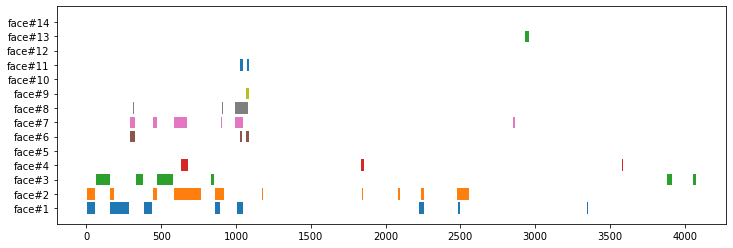

In [81]:


with open('timeline.json') as f:
    timeline = json.load(f)

data = []
face = {}
colormapping = {}

counter = 1
for name, val in timeline["face_timeline"].items():
    for v in val:
        data.append((v[0], v[1], name))
    face[name] = counter
    colormapping[name] = "C{}".format(counter-1)
    counter += 1


# data = [    (0, 10, 'sleep'),
#             (5, 15, 'eat'),
#             (5, 30, 'work'),
#             (15, 30, 'sleep'),
#             (30, 35, 'eat'), 
#             (40, 50, 'work')
#         ]

# cats = {"sleep" : 1, "eat" : 2, "work" : 3}
# colormapping = {"sleep" : "C0", "eat" : "C1", "work" : "C2"}

verts = []
colors = []
for d in data:
    v =  [((d[0]), face[d[2]]-.4),
          ((d[0]), face[d[2]]+.4),
          ((d[1]), face[d[2]]+.4),
          ((d[1]), face[d[2]]-.4),
          ((d[0]), face[d[2]]-.4)]
    verts.append(v)
    colors.append(colormapping[d[2]])

bars = PolyCollection(verts, facecolors=colors)

fig, ax = plt.subplots(figsize=(12, 4))
ax.add_collection(bars)
ax.autoscale()
# loc = mdates.MinuteLocator(byminute=[0,15,30,45])
# ax.xaxis.set_major_locator(loc)
# ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

ax.set_yticks(range(1, len(timeline["face"])+1))
# print(timeline["face"])
ax.set_yticklabels(timeline["face"])
# ax.figure(figsize=(50,10)) 
plt.show()